In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten, BatchNormalization,Dropout
from keras.datasets import cifar10
from keras.applications.vgg16 import VGG16

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train[0].shape

(32, 32, 3)

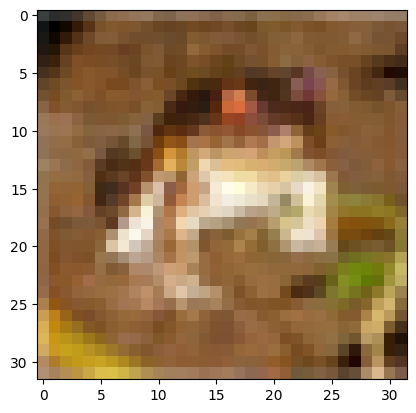

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
y_train[0][0]

6

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_train[0][0]]

'frog'

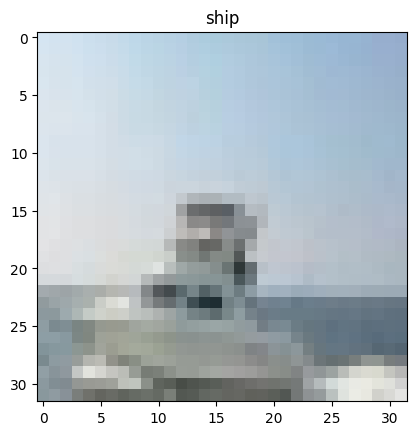

In [7]:
def show_fig(X,y):
  plt.imshow(X)
  plt.title(classes[y])

show_fig(X_train[100],y_train[100][0])

In [8]:
X_train,X_test = X_train/255,X_test/255

In [9]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape=(32,32,3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [10]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [38]:
model = Sequential()
model.add(conv_base)

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [40]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 30s 17ms/step - loss: 0.3830 - accuracy: 0.8980 - val_loss: 1.4361 - val_accuracy: 0.7357
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2354 - accuracy: 0.9274 - val_loss: 1.4449 - val_accuracy: 0.7245
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2287 - accuracy: 0.9289 - val_loss: 1.6059 - val_accuracy: 0.7284
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2332 - accuracy: 0.9288 - val_loss: 1.3908 - val_accuracy: 0.7291
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2184 - accuracy: 0.9347 - val_loss: 1.5549 - val_accuracy: 0.7369
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2118 - accuracy: 0.9361 - val_loss: 1.6814 - val_accuracy: 0.7367
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2045 - accuracy: 0.9383 - val_loss: 1.6717 -

In [41]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 3s 9ms/step - loss: 1.7461 - accuracy: 0.7364
Test Accuracy: 0.7364000082015991


In [42]:
import cv2

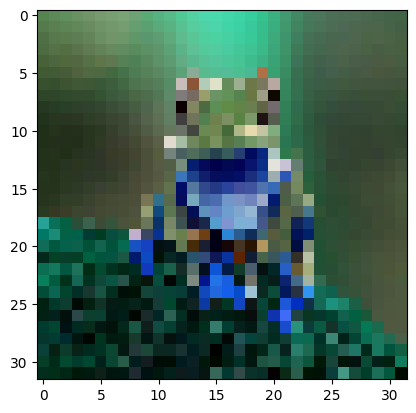

In [43]:
test_img1 = cv2.imread('/content/frog1.jpg')
test_img1 = cv2.resize(test_img1,(32,32))
plt.imshow(test_img1)

In [44]:
test_input = test_img1.reshape((1,32,32,3))
classes[model.predict(test_input).argmax(axis=1)[0]]

1/1 [==============================] - 0s 139ms/step


'automobile'

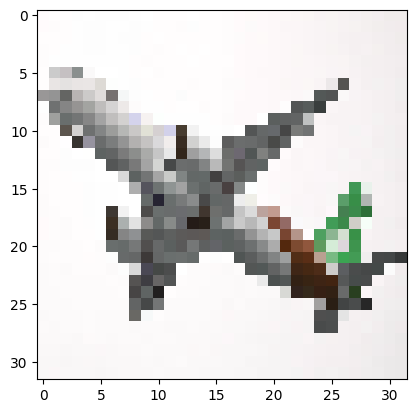

In [45]:
test_img2 = cv2.imread('/content/airplane1.jpg')
test_img2 = cv2.resize(test_img2,(32,32))
plt.imshow(test_img2)

In [46]:
test_input = test_img2.reshape((1,32,32,3))
classes[model.predict(test_input).argmax(axis=1)[0]]

1/1 [==============================] - 0s 18ms/step


'airplane'